In [ ]:
import numpy as np
from keras.saving import load_model
from sklearn.preprocessing import LabelEncoder

# Load the test images and labels
images_test = np.load('../getDataSet/dataset/images_test.npy')
number_labels_test = np.load('../getDataSet/dataset/labels_test.npy')[:, 0]
suites_labels_test = np.load('../getDataSet/dataset/labels_test.npy')[:, 1]

# Load the pre-trained models for suites and numbers
suitesModel = load_model("./models/SuitesCNN.keras")
numberModel = load_model("./models/NumberCNN.keras")

# Initialize the LabelEncoders and load the classes
suitesEncoder = LabelEncoder()
suitesEncoder.classes_ = np.load('./encoders/SuitesEncoder.npy')
numberEncoder = LabelEncoder()
numberEncoder.classes_ = np.load('./encoders/NumberEncoder.npy')


In [28]:
# Predict the numbers and suites for the test images using the pre-trained models
numPred = numberModel.predict(images_test)
suitesPred = suitesModel.predict(images_test)

# Convert the predicted probabilities to class labels for numbers
numPredLabels = numberEncoder.inverse_transform(np.argmax(numPred, axis=1))

# Convert the predicted probabilities to class labels for suites
suitesPredLabels = suitesEncoder.inverse_transform(np.argmax(suitesPred, axis=1))


38/38 [==============================] - 1s 28ms/step


Number: J Suit: c


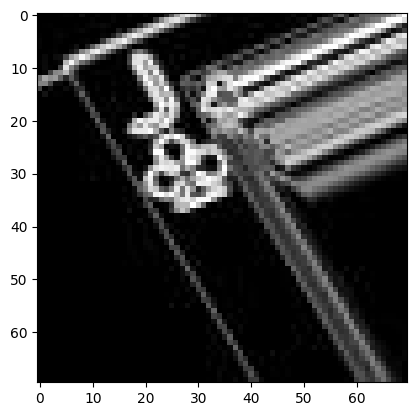

In [68]:
import random
import matplotlib.pyplot as plt

# Generate a random index within the range of the test set
ranindex = random.randint(0, len(number_labels_test) - 1)

# Display the image at the random index using a grayscale color map
plt.imshow(images_test[ranindex], cmap="gray")

# Print the predicted number and suit for the randomly selected test image
print(f"Number: {numPredLabels[ranindex]} Suit: {suitesPredLabels[ranindex]}")
